In [45]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import os 
import cv2 

from PIL import Image 
from tensorflow import keras 
import tensorflow.keras.layers as  k


In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [70]:
img = keras.utils.load_img("E:/MCID/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png" ,color_mode="rgb",
    target_size=(64 ,64))

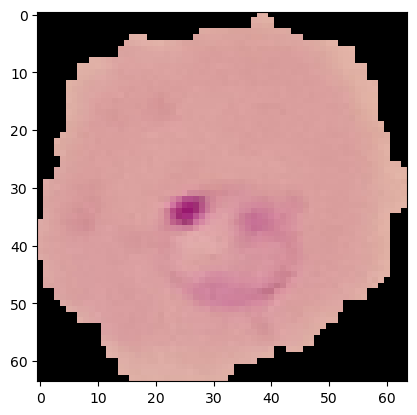

In [71]:
plt.imshow(img)

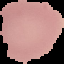

In [72]:
load_img("E:/MCID/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_34.png"  , target_size= (64 ,64 ))

In [62]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [63]:
img_dir = "E:/MCID/cell_images/"
size = 64
dataset = []
label = []

In [48]:
parasatized_img = os.listdir(img_dir + "Parasitized/")
for i ,img_name in enumerate(parasatized_img):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(img_dir + "Parasitized/" + img_name)
        image = Image.fromarray(image , 'RGB')
        image = image.resize((size , size) )
        
        dataset.append(np.array(image))
        label.append(0)

In [64]:
uninfected_img = os.listdir(img_dir + "Uninfected/")
for i ,img_name in enumerate(uninfected_img):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(img_dir + "Uninfected/" + img_name)
        image = Image.fromarray(image , 'RGB')
        image = image.resize((size , size) )
        
        dataset.append(np.array(image))
        label.append(1)

In [65]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical 
from tqdm.notebook import tqdm 

In [27]:
uninfected_img = os.listdir(img_dir + "Uninfected/")
uninfected_img = uninfected_img[:3000]
for i ,img_name in enumerate(tqdm(uninfected_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(img_dir + "Uninfected/" + img_name)
        image = Image.fromarray(image , 'RGB')
        image = image.resize((size , size) )
        
        dataset.append(np.array(image))
        label.append(1)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [28]:
parasatized_img = os.listdir(img_dir + "Parasitized/")
parasatized_img = parasatized_img[:3000]
for i ,img_name in enumerate(tqdm(parasatized_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(img_dir + "Parasitized/" + img_name)
        image = Image.fromarray(image , 'RGB')
        image = image.resize((size , size) )
        
        dataset.append(np.array(image))
        label.append(0)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [73]:
xtrain , xtest ,ytrain, ytest = train_test_split(dataset ,to_categorical(np.array(label)) , test_size= 0.2 , random_state= 0)

In [74]:
INPUT_SHAPE = (size , size , 3)
inp = k.Input(shape= INPUT_SHAPE)
conv1 = k.Conv2D(32 ,kernel_size= (3 , 3) , activation= 'relu' , padding= 'same')(inp)
pool1 = k.MaxPool2D(pool_size=(2 ,2 ))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate = 0.2 )(norm1)

conv2 = k.Conv2D(32 ,kernel_size= (3 , 3) , activation= 'relu' , padding= 'same')(drop1)
pool2 = k.MaxPool2D(pool_size=(2 ,2 ))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2 )(norm2)

flat = k.Flatten()(drop2)

hidden1 = k.Dense(units= 512 , activation = 'relu')(flat)
norm3 = k.BatchNormalization(axis =-1)(hidden1)
drop3 = k.Dropout(rate = 0.2)(norm3)

hidden2 = k.Dense(units= 256 , activation = 'relu')(drop3)
norm4 = k.BatchNormalization(axis =-1)(hidden2)
drop4 = k.Dropout(rate = 0.2)(norm4)

out = k.Dense(2 ,activation= 'sigmoid')(drop4)


In [75]:
model = keras.Model(inputs = inp , outputs = out )
model.compile(optimizer = 'adam' ,  metrics= ['accuracy'] , loss = 'categorical_crossentropy')
print(model.summary())

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,340,130 (16.56 MB)

 Trainable params: 4,338,466 (16.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

None


In [80]:
history = model.fit(np.array(xtrain) , ytrain , batch_size= 64 , verbose =1 , epochs = 15 , validation_split= 0.1 ,shuffle = False  )

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.9991 - loss: 0.0199 - val_accuracy: 1.0000 - val_loss: 0.0109
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 284ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 287ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 252ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 312ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accu

In [81]:
model.evaluate(np.array(xtest) , np.array(ytest))[1]*100

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 4.4825e-04


100.0

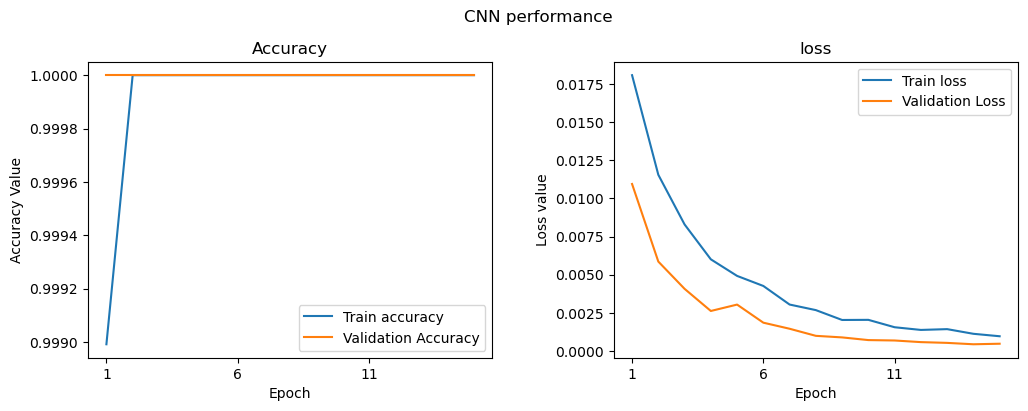

In [82]:
f ,(ax1 , ax2) = plt.subplots(1 ,2 , figsize = (12 , 4))
t  = f.suptitle('CNN performance' , fontsize = 12 )
f.subplots_adjust(top = 0.85 , wspace = 0.3)

max_epoch = len(history.history['accuracy']) +1 
epoch_list = list(range(1 , max_epoch))
ax1.plot(epoch_list , history.history['accuracy'] , label = 'Train accuracy')
ax1.plot(epoch_list ,history.history['val_accuracy'] , label = 'Validation Accuracy')
ax1.set_xticks(np.arange(1 , max_epoch , 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = "best")

ax2.plot(epoch_list , history.history['loss'] , label = "Train loss")
ax2.plot(epoch_list , history.history['val_loss'] , label = 'Validation Loss')
ax2.set_xticks(np.arange(1 , max_epoch , 5))
ax2.set_ylabel("Loss value")
ax2.set_xlabel("Epoch")
ax2.set_title("loss")
l2 = ax2.legend(loc ="best")

In [90]:
from tensorflow.keras.layers import Convolution2D , MaxPooling2D , Flatten , Dense , BatchNormalization , Dropout
from tensorflow.keras.models import Sequential 
SIZE = 64 
model = None 
model = Sequential()
model.add(Convolution2D(32 , (3 ,3 ) , input_shape =(size , size , 3) , activation = 'relu' , data_format = 'channels_last'))
model.add(MaxPooling2D(pool_size = (2 , 2) , data_format = "channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32 , (3 ,3) , activation ='relu'))
model.add(MaxPooling2D(pool_size = (2 ,2) , data_format = "channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32 , (3 ,3 ) , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2 ,2) , data_format = "channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu' , units = 512))
model.add(BatchNormalization(axis = -1 ))
model.add(Dropout(0.2))
model.add(Dense(activation ='relu' , units = 256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid' , units = 2 ))
model.compile(optimizer='adam' , loss= 'categorical_crossentropy' , metrics = ['accuracy'])
print(model.summary())

C:\Users\anant\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 745,026 (2.84 MB)

 Trainable params: 743,298 (2.84 MB)

 Non-trainable params: 1,728 (6.75 KB)

None


In [91]:
history = model.fit(np.array(xtrain) , ytrain , batch_size= 64 , verbose =1 , epochs = 15 , validation_split= 0.1 ,shuffle = False  )

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.5863 - loss: 0.8363 - val_accuracy: 0.5438 - val_loss: 0.6887
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8724 - loss: 0.3559 - val_accuracy: 1.0000 - val_loss: 0.1105
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9749 - loss: 0.1533 - val_accuracy: 1.0000 - val_loss: 0.0414
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9941 - loss: 0.0687 - val_accuracy: 1.0000 - val_loss: 0.0172
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9975 - loss: 0.0358 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 1.0000 - loss: 0.0191 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 1.0000 - v

In [92]:
model.evaluate(np.array(xtest) , np.array(ytest))[1]*100

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 8.9525e-04


100.0

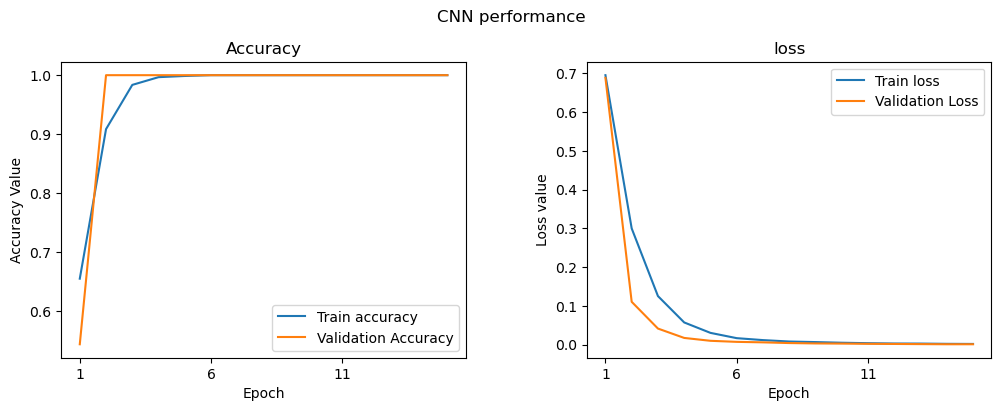

In [93]:
f ,(ax1 , ax2) = plt.subplots(1 ,2 , figsize = (12 , 4))
t  = f.suptitle('CNN performance' , fontsize = 12 )
f.subplots_adjust(top = 0.85 , wspace = 0.3)

max_epoch = len(history.history['accuracy']) +1 
epoch_list = list(range(1 , max_epoch))
ax1.plot(epoch_list , history.history['accuracy'] , label = 'Train accuracy')
ax1.plot(epoch_list ,history.history['val_accuracy'] , label = 'Validation Accuracy')
ax1.set_xticks(np.arange(1 , max_epoch , 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = "best")

ax2.plot(epoch_list , history.history['loss'] , label = "Train loss")
ax2.plot(epoch_list , history.history['val_loss'] , label = 'Validation Loss')
ax2.set_xticks(np.arange(1 , max_epoch , 5))
ax2.set_ylabel("Loss value")
ax2.set_xlabel("Epoch")
ax2.set_title("loss")
l2 = ax2.legend(loc ="best")